In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr2911.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df_feelings = df[identifier_columns+positive_feelings_in_school]

In [5]:
pivot_df_feelingsinschool = df_feelings.pivot_table(values=positive_feelings_in_school, index=identifier_columns, aggfunc='mean')

In [6]:
pivot_df_feelingsinschool

ASBG10A   ASBG10B   ASBG10C   ASBG10D   ASBG10E  \
Country     ASBH02A                                                     
Austria     No       1.759465  1.570470  1.584650  1.525843  1.373034   
            Yes      1.826697  1.577666  1.442907  1.426694  1.369663   
Egypt       No       1.398374  1.567797  1.534188  1.521368  1.521368   
            Yes      1.332029  1.471939  1.427242  1.403639  1.370424   
France      No       1.627119  1.703863  1.538793  1.914530  1.480851   
            Yes      1.768795  1.718054  1.462446  1.935719  1.549091   
Germany     No       1.568966  1.544379  1.534884  1.530120  1.434524   
            Yes      1.705419  1.468125  1.348620  1.315101  1.352225   
Jordan      No       1.220339  1.302674  1.258342  1.266304  1.198276   
            Yes      1.235333  1.299451  1.281762  1.282546  1.225764   
Netherlands No       1.538462  1.384615  1.649351  1.153846  1.243590   
            Yes      1.571354  1.386827  1.482162  1.157344  1.313838   
Sweden      No       1.644295  1.450512  1.665517  1.391156  1.494774   
            Yes      1.814129  1.414367  1.552222  1.383390  1.552511   

                      ASBG10F  
Country     ASBH02A            
Austria     No       1.170404  
            Yes      1.095739  
Egypt       No       1.461207  
            Yes      1.304383  
France      No       1.175214  
            Yes      1.129806  
Germany     No       1.257485  
            Yes      1.106132  
Jordan      No       1.285714  
            Yes      1.239734  
Netherlands No       1.166667  
            Yes      1.085162  
Sweden      No       1.202703  
            Yes      1.111747

In [7]:
# Calculate the total average for each row
pivot_df_feelingsinschool['MeanTotal'] = pivot_df_feelingsinschool[['ASBG10A','ASBG10B','ASBG10C','ASBG10D','ASBG10E','ASBG10F']].mean(axis=1)

# Sort countries by the total average
country_averages = pivot_df_feelingsinschool.groupby('Country')['MeanTotal'].mean().sort_values(ascending=True).index.tolist()

### Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

In [8]:
# Get the current index as a DataFrame for sorting
index_df = pivot_df_feelingsinschool.index.to_frame()

In [9]:
index_df

Country ASBH02A
Country     ASBH02A                     
Austria     No           Austria      No
            Yes          Austria     Yes
Egypt       No             Egypt      No
            Yes            Egypt     Yes
France      No            France      No
            Yes           France     Yes
Germany     No           Germany      No
            Yes          Germany     Yes
Jordan      No            Jordan      No
            Yes           Jordan     Yes
Netherlands No       Netherlands      No
            Yes      Netherlands     Yes
Sweden      No            Sweden      No
            Yes           Sweden     Yes

In [10]:
# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=country_averages, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_feelingsinschool.loc[index_df.index]

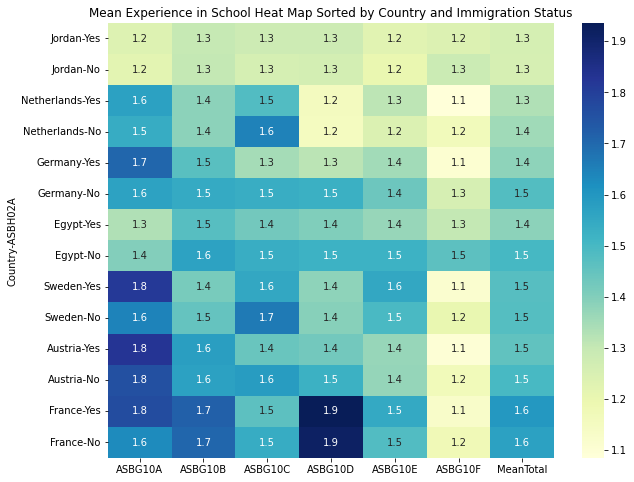

In [11]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

 1: Agree a lot; 2: Agree a little; 3: Disagree a little; 4: Disagree a lot\
 
ASBG10A	GEN\AGREE\BEING IN SCHOOL\
ASBG10B	GEN\AGREE\SAFE AT SCHOOL\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL

lighter colours are better

In [12]:
df['avgscore'] = df[positive_feelings_in_school].mean(axis=1)

In [13]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [14]:
# Create a contingency table
contingency_table2 = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['avgscore_binned'])

In [15]:
# Convert the contingency table to a format suitable for Plotly
contingency_table2_reset = contingency_table2.reset_index()
contingency_table2_melted = contingency_table2_reset.melt(id_vars=['ASBH02A','Country'], var_name='avgscore_binned', value_name='count')
# Convert Interval objects to strings
contingency_table2_melted['avgscore_binned'] = contingency_table2_melted['avgscore_binned'].astype(str)

In [16]:
df_yes = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'Yes']

In [17]:
heatmap_yes = df_yes.pivot(index='Country',columns="avgscore_binned",values = "count")

In [18]:
heatmap_yes["total"]= heatmap_yes.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_yes = heatmap_yes['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_yes = heatmap_yes.div(total_column_yes, axis=0) * 100
df_percentage_yes = df_percentage_yes.drop("total", axis = 1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_yes_reset = df_percentage_yes.reset_index()
df_percentage__yes_melted = df_percentage_yes_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')

In [19]:
# Convert Interval objects to strings
df_percentage__yes_melted['avgscore_binned'] = df_percentage__yes_melted['avgscore_binned'].astype(str)

In [20]:
# Convert avgscore_binned to categorical with the specified order
df_percentage__yes_melted['avgscore_binned'] = pd.Categorical(df_percentage__yes_melted['avgscore_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

In [21]:
heatmap_percent_yes = df_percentage__yes_melted.pivot(index = "avgscore_binned", columns = "Country", values = "percentage")

In [22]:
df_no = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'No']
df_no= df_no.drop('ASBH02A', axis=1)
heatmap_no = df_no.pivot(index='Country',columns="avgscore_binned",values = "count")

In [23]:
heatmap_no["total"] = heatmap_no.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_no = heatmap_no['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_no = heatmap_no.div(total_column_no, axis=0) * 100
df_percentage_no = df_percentage_no.drop("total", axis=1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_no_reset = df_percentage_no.reset_index()
df_percentage_no_melted = df_percentage_no_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')


In [24]:
# Convert Interval objects to strings
df_percentage_no_melted['avgscore_binned'] = df_percentage_no_melted['avgscore_binned'].astype(str)

# Convert avgscore_binned to categorical with the specified order
# Convert avgscore_binned to categorical with the specified order
df_percentage_no_melted['avgscore_binned'] = pd.Categorical(df_percentage_no_melted['avgscore_binned'], 
                                       categories=[
                                           '(0.997, 1.3]','(1.3, 1.6]','(1.6, 1.9]','(1.9, 2.2]','(2.2, 2.5]','(2.5, 2.8]','(2.8, 3.1]','(3.1, 3.4]','(3.4, 3.7]','(3.7, 4.0]'], 
                                       ordered=True)

heatmap_percent_no = df_percentage_no_melted.pivot(index="avgscore_binned", columns="Country", values="percentage")


## Now let's plot the two on the same figure to compare

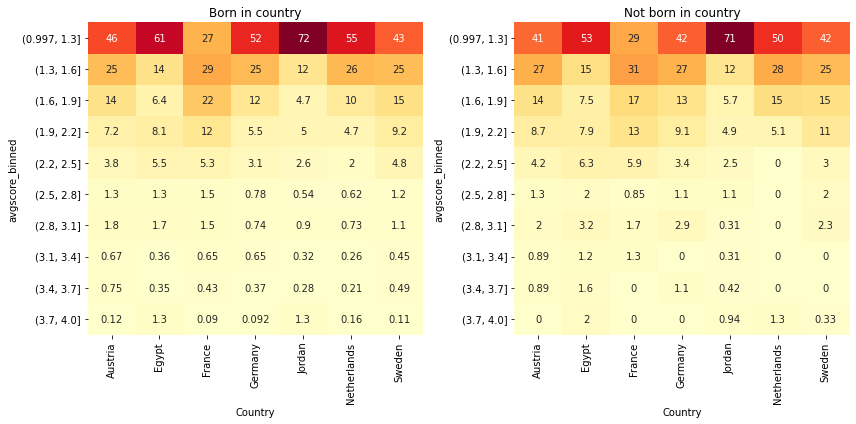

In [25]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_percent_yes, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_percent_no, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='avgscore_binned'>

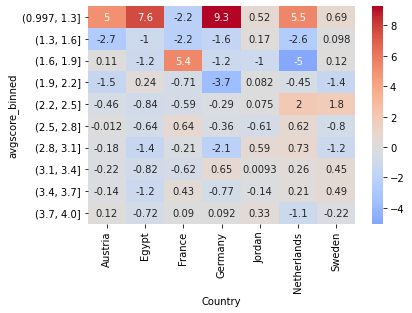

In [26]:
diff_data = heatmap_percent_yes - heatmap_percent_no

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [27]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38469
0.0     1108
3.0      852
6.0      480
8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [28]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [29]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38469
 0.0     1108
 3.0      852
 6.0      480
 8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [30]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [31]:
pivot_minage

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,1.458053,1.443902,1.528927,1.476923,1.559887
Egypt,1.402920,1.479006,1.418519,1.740196,1.615278
France,1.593398,1.602564,1.665459,1.462585,1.533333
Germany,1.384632,1.446809,1.465128,1.555238,1.511538
Iran,NaN,NaN,NaN,NaN,NaN
Jordan,1.270166,1.263266,1.284843,1.267003,1.382051
Netherlands,1.334791,1.358974,1.406250,1.362963,1.200000
Sweden,1.474186,1.499383,1.482201,1.402252,1.526126
Turkey,NaN,NaN,NaN,NaN,NaN


In [32]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

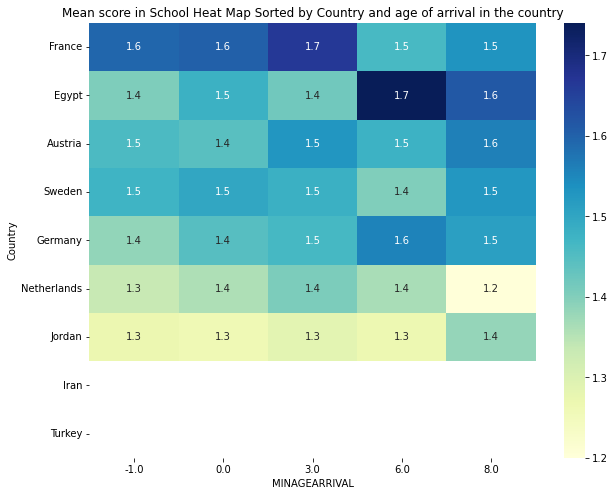

In [34]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()